In [34]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [35]:
# Step 1: Load the time series data
#loaded a test data from all combined data of normal and attack
from google.colab import files
uploaded = files.upload()
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['test.csv']))


Saving test.csv to test (2).csv


In [36]:
df_agg = df.groupby(['Sensor', '_Timestamp']).agg({'Value': 'sum'}).reset_index()


In [37]:
graph = nx.DiGraph()

In [38]:
# Iterate over the rows and add edges with weights
for i in range(len(df_agg)):
    sensor = df_agg.loc[i, 'Sensor']
    timestamp = df_agg.loc[i, '_Timestamp']
    value = df_agg.loc[i, 'Value']
    graph.add_edge(sensor, timestamp, weight=value)


In [39]:
# Compute PageRank scores
pagerank_scores = nx.pagerank(graph)

In [40]:
# Identify anomalous nodes based on PageRank scores
threshold = 0.05 # Set a threshold for anomaly detection
anomalous_nodes = [sensor for sensor, score in pagerank_scores.items() if score < threshold]


In [41]:
#  Plot the graph, highlighting anomalous nodes
pos = nx.spring_layout(graph)  # Positions for the nodes


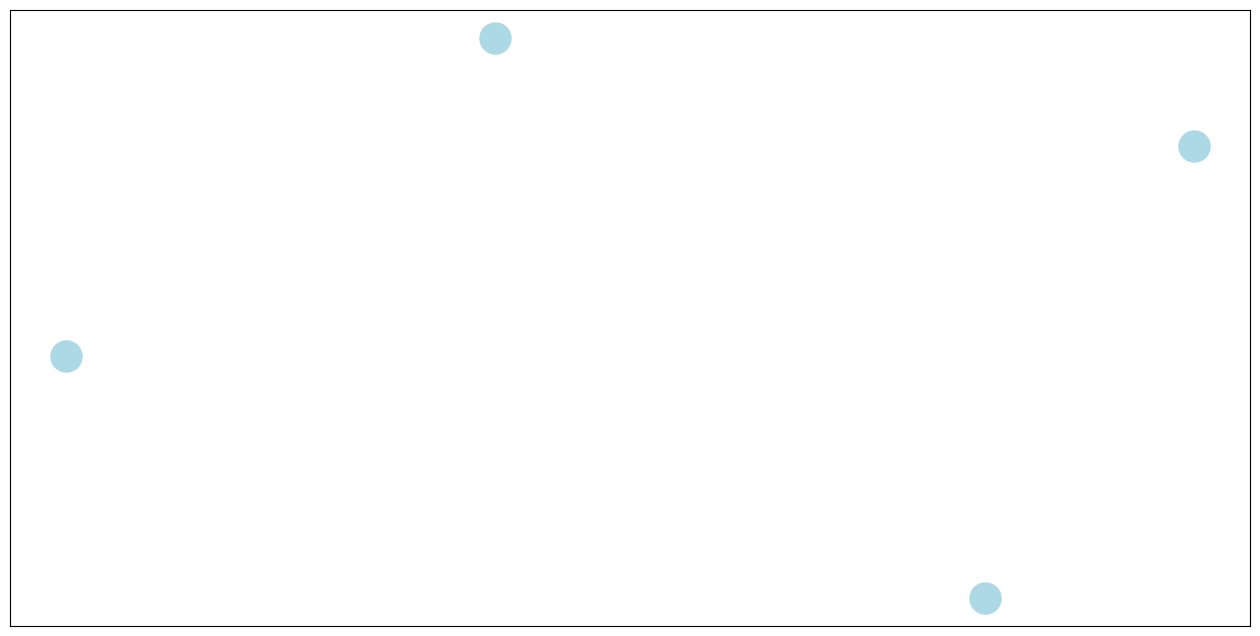

In [42]:
# Draw normal nodes
fig, ax = plt.subplots(figsize=(16, 8))

nx.draw_networkx_nodes(graph, pos, nodelist=list(set(pagerank_scores.keys()) - set(anomalous_nodes)), node_color='lightblue', node_size=500)


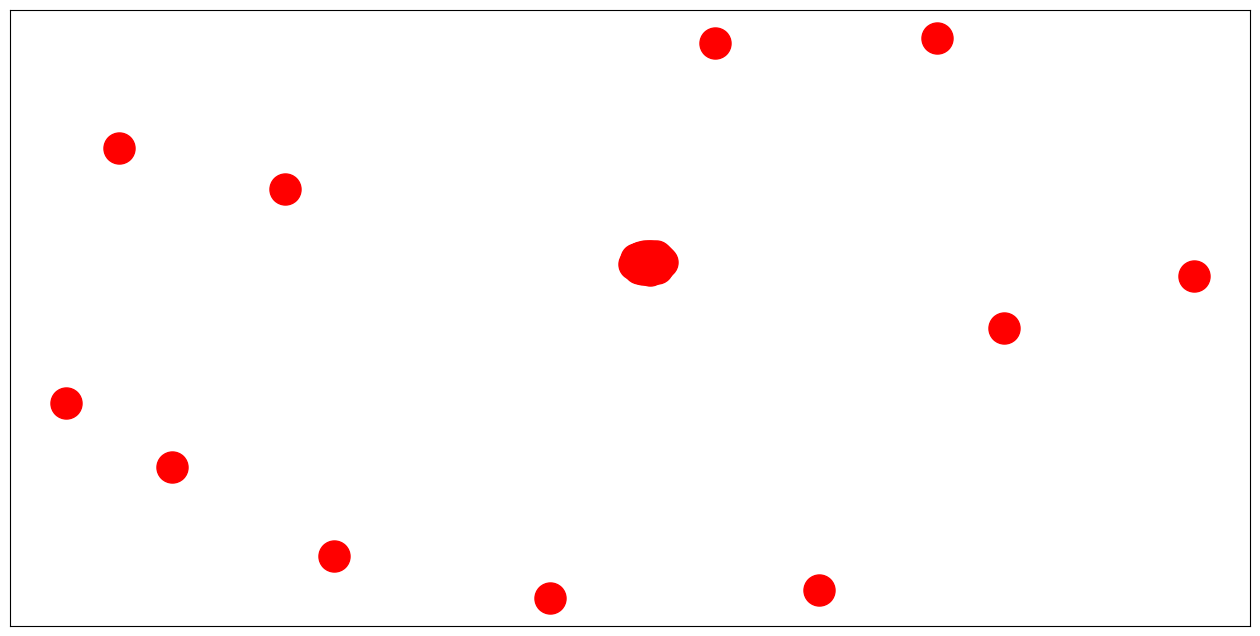

In [43]:
# Draw anomalous nodes with a different color
fig, ax = plt.subplots(figsize=(16, 8))
nx.draw_networkx_nodes(graph, pos, nodelist=anomalous_nodes, node_color='red', node_size=500)



{('AIT201',
  '22/12/2015_4:30:00_PM'): Text(0.4028805315813777, 0.2518253105751435, '251.9226'),
 ('AIT201',
  '22/12/2015_4:30:01_PM'): Text(-0.43129307898265484, -0.0396054445512665, '251.9226'),
 ('AIT201',
  '22/12/2015_4:30:02_PM'): Text(0.24873372014706574, -0.37685192269125234, '251.9226'),
 ('AIT201',
  '22/12/2015_4:30:03_PM'): Text(-0.11393006911664322, 0.4028483322409277, '251.9226'),
 ('AIT202',
  '22/12/2015_4:30:00_PM'): Text(0.4014628355077441, 0.24971149602433185, '8.313446'),
 ('AIT202',
  '22/12/2015_4:30:01_PM'): Text(-0.43271077505628847, -0.041719259102078146, '8.313446'),
 ('AIT202',
  '22/12/2015_4:30:02_PM'): Text(0.24731602407343212, -0.378965737242064, '8.313446'),
 ('AIT202',
  '22/12/2015_4:30:03_PM'): Text(-0.11534776519027685, 0.40073451769011603, '8.313446'),
 ('AIT203',
  '22/12/2015_4:30:00_PM'): Text(0.4028802109921573, 0.2516909956220174, '312.7916'),
 ('AIT203',
  '22/12/2015_4:30:01_PM'): Text(-0.43129339957187524, -0.0397397595043926, '312.7916'),

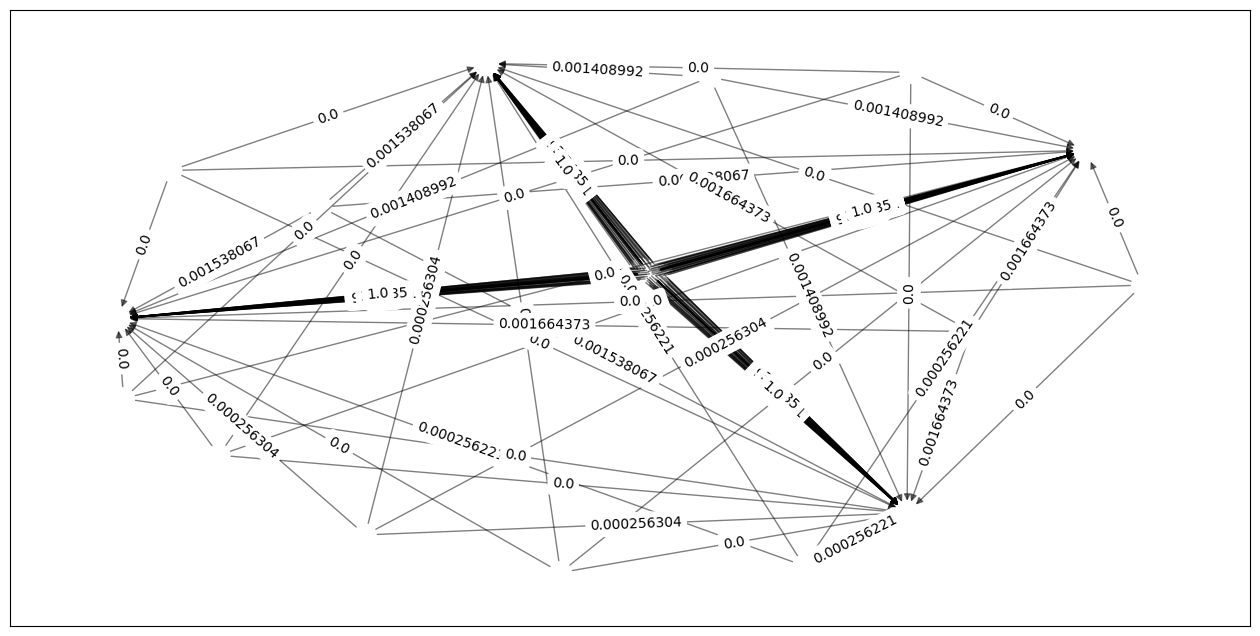

In [44]:
# Draw edges with weights as labels
fig, ax = plt.subplots(figsize=(16, 8))

edge_labels = nx.get_edge_attributes(graph, 'weight')
nx.draw_networkx_edges(graph, pos, alpha=0.5)
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)



{'AIT201': Text(0.026614955476387026, 0.03955245899698741, 'AIT201\n0.011'),
 '22/12/2015_4:30:00_PM': Text(0.7791461076863684, 0.4640981621532996, '22/12/2015_4:30:00_PM\n0.113'),
 '22/12/2015_4:30:01_PM': Text(-0.8892011134416967, -0.11876334809952041, '22/12/2015_4:30:01_PM\n0.113'),
 '22/12/2015_4:30:02_PM': Text(0.47085248481774444, -0.7932563043794921, '22/12/2015_4:30:02_PM\n0.113'),
 '22/12/2015_4:30:03_PM': Text(-0.25447509370967347, 0.766144205484868, '22/12/2015_4:30:03_PM\n0.113'),
 'AIT202': Text(0.023779563329119763, 0.03532482989536412, 'AIT202\n0.011'),
 'AIT203': Text(0.02661431429794625, 0.03928382909073521, 'AIT203\n0.011'),
 'AIT401': Text(-0.7974589576765975, 0.3950885649888764, 'AIT401\n0.011'),
 'AIT402': Text(0.02708702698834897, 0.039068543950514616, 'AIT402\n0.011'),
 'AIT501': Text(0.025339523047906463, 0.04313890092585187, 'AIT501\n0.011'),
 'AIT502': Text(0.026289310695426678, 0.03933755194330074, 'AIT502\n0.011'),
 'AIT503': Text(0.026204421404266254, 0.03

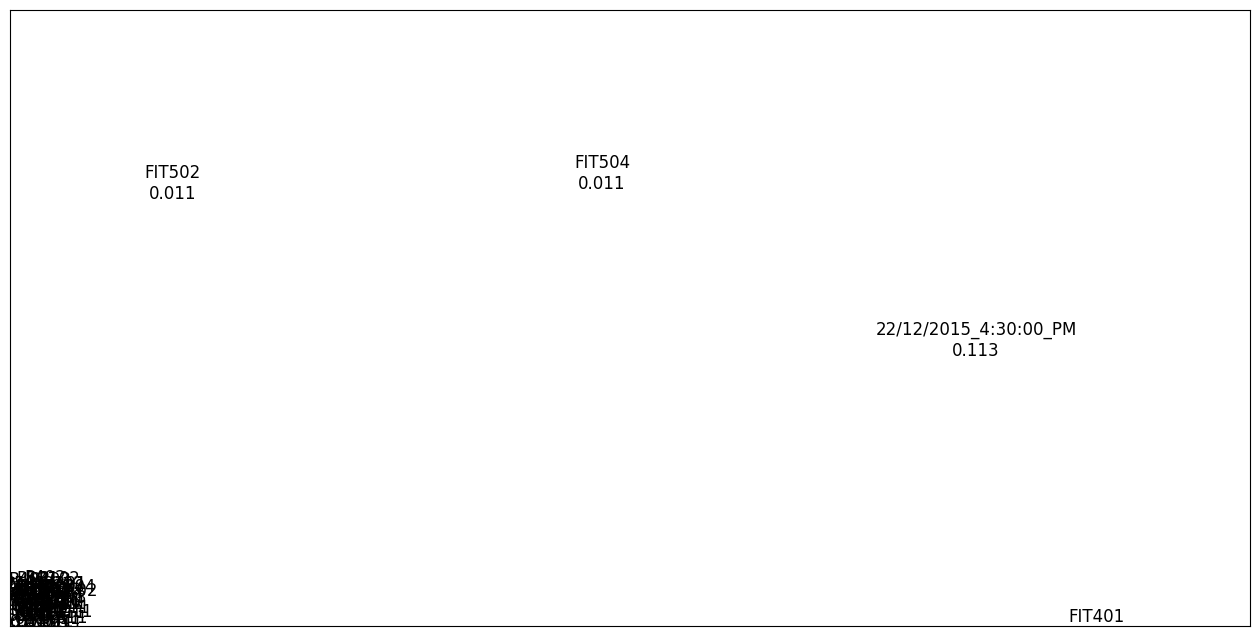

In [45]:
# Draw labels for high PageRank scores
fig, ax = plt.subplots(figsize=(16, 8))

node_labels = {sensor: f"{sensor}\n{score:.3f}" for sensor, score in pagerank_scores.items()}
nx.draw_networkx_labels(graph, pos, labels=node_labels)


In [ ]:

import networkx as nx
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16, 8))

ax.set_axis_off()
plt.show()


In [73]:
ground_truth_labels = [1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0]  # Assuming 0 represents normal and 1 represents anomaly


In [74]:
predicted_labels = [1 if sensor in anomalous_nodes else 0 for sensor in graph.nodes]


In [75]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(ground_truth_labels, predicted_labels)
recall = recall_score(ground_truth_labels, predicted_labels)
f1 = f1_score(ground_truth_labels, predicted_labels)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: 0.3137254901960784
Recall: 1.0
F1 Score: 0.47761194029850745
